<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Digits dataset from sklearn**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
# digits.sample(5)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

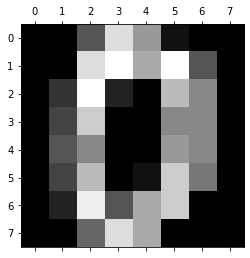

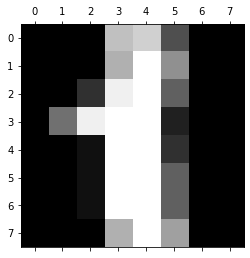

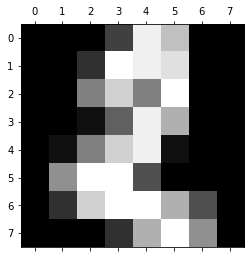

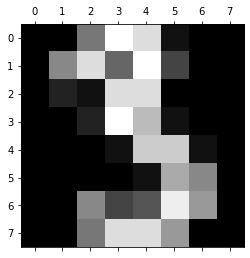

In [4]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [7]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target'] = digits.target

In [32]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
1212,0.0,0.0,6.0,14.0,13.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,5.0,16.0,6.0,0.0,0.0,0.0,0
1196,0.0,1.0,7.0,14.0,10.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,4.0,14.0,14.0,12.0,2.0,0.0,9
972,0.0,0.0,5.0,15.0,2.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,4.0,15.0,16.0,16.0,16.0,16.0,1
430,0.0,0.0,6.0,12.0,12.0,15.0,16.0,6.0,0.0,2.0,...,0.0,0.0,0.0,8.0,16.0,3.0,0.0,0.0,0.0,7
498,0.0,0.0,2.0,5.0,5.0,11.0,15.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,7


**Train and the model and prediction**

In [12]:
X = df.drop('target',axis='columns')
y = df.target

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model.score(X_test, y_test)

0.9805555555555555

In [26]:
y_predicted = model.predict(X_test)

**classification report**

In [27]:
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      1.00      1.00        40
           2       1.00      1.00      1.00        40
           3       0.98      0.95      0.96        42
           4       1.00      1.00      1.00        37
           5       1.00      1.00      1.00        29
           6       1.00      0.97      0.98        32
           7       0.97      0.97      0.97        36
           8       0.94      0.97      0.95        31
           9       0.94      0.94      0.94        34

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



**Confusion Matrix**

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[39,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 32]], dtype=int64)

Text(69.0, 0.5, 'Truth')

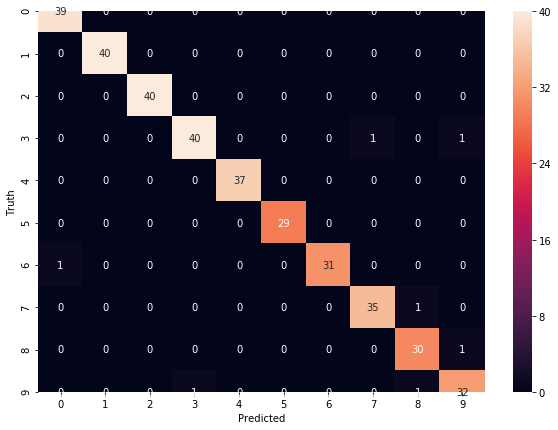

In [31]:
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Exercise**

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.
1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees